In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import cv2
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [3]:
X = np.load("DataForSVM/XRootDATA.npy")
y = np.load("DataForSVM/yRootLabels.npy")
#print(len(X))
#print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(len(X_train[0]))
print(len(X_train))
print(len(X_test))

75
5566
1392


In [4]:
y_train_binarized = label_binarize(y_train, classes = [0,1,2,3,4,5,6,7])
y_test_binarized = label_binarize(y_test, classes = [0,1,2,3,4,5,6,7])

print(X_train[:2])
print(y_train[:2])
print(X_test[:2])
print(y_test[:2])
print(y_train_binarized[:2])
print("ytestbin:",y_test_binarized[:2])

[[0.583838 0.35009  0.928336 0.555159 0.407303 0.937863 0.536767 0.399059
  0.854594 0.485647 0.41016  0.900806 0.436605 0.418196 0.849698 0.577588
  0.412712 0.839474 0.632772 0.39639  0.827755 0.679726 0.366298 0.887009
  0.5      0.5      0.737107 0.487692 0.4917   0.679611 0.397889 0.47817
  0.683587 0.314107 0.48905  0.662881 0.508192 0.518984 0.70926  0.487826
  0.628019 0.716646 0.489825 0.739696 0.742958 0.577657 0.344593 0.907875
  0.       0.       0.       0.559241 0.355541 0.841317 0.       0.
  0.       0.528602 0.756158 0.648826 0.524487 0.755947 0.598545 0.485705
  0.756131 0.646503 0.29172  0.489042 0.583154 0.291664 0.478157 0.66246
  0.305932 0.486277 0.477683]
 [0.620432 0.467344 0.881184 0.583624 0.500006 0.854853 0.577568 0.48369
  0.833111 0.546894 0.464496 0.818794 0.516317 0.439957 0.885884 0.593893
  0.510895 0.772875 0.63471  0.548909 0.842856 0.679675 0.551843 0.833697
  0.5      0.5      0.606257 0.501989 0.48096  0.644747 0.46927  0.404652
  0.369795 0.4039

In [5]:
random_state = np.random.RandomState(0)
import time
start_time = time.time()
#Create the classifier
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability = True, random_state = random_state))

y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Predict the test data
y_pred = clf.predict(X_test)

print("Time: %s seconds" % (time.time()-start_time))
print(y_pred[:2])

Time: 3.9614052772521973 seconds
[6 3]


In [6]:
#save model
import pickle
filename = 'Models/svm_model_root_openpose_features.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [7]:
#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred, target_names = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']))

                 precision    recall  f1-score   support

      Arabesque       1.00      1.00      1.00       190
      Demi-Plie       1.00      1.00      1.00       184
      Developpe       0.99      0.98      0.99       175
         Penche       0.99      1.00      1.00       169
         Retire       1.00      0.99      0.99       168
Second-Position       1.00      1.00      1.00       155
       Sus-sous       1.00      1.00      1.00       185
          Tendu       0.98      1.00      0.99       166

       accuracy                           1.00      1392
      macro avg       1.00      1.00      1.00      1392
   weighted avg       1.00      1.00      1.00      1392



In [8]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9964080459770115


In [9]:
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'macro'))

Recall: 0.9963690476190477


In [10]:
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'macro'))

Precision: 0.9963232276185092


In [11]:
print("F1 score:", metrics.f1_score(y_test,y_pred, average = 'macro'))

F1 score: 0.9963265808482962


EER:0.00020542317173377156
Equal Error Rate: 0.0002054231717337716


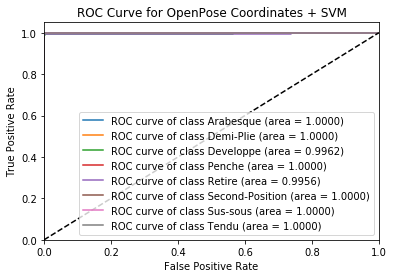

In [13]:
import matplotlib.pyplot as plt
#ROC and AUC
fpr = dict()
tpr = dict()
fnr = dict()
eer = dict()
totalEER = 0
roc_auc = dict()
n_classes = 8

#print(y_test.shape)
#print(y_score.shape)
#print(y_test_binarized.shape)
#Compute ROC curve for each class:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    fnr[i] = 1 - tpr[i]
    eer[i] = fpr[i][np.nanargmin(np.absolute((fnr[i]-fpr[i])))]
    totalEER += eer[i]
    roc_auc[i] = auc(fpr[i], tpr[i])
    
averageEER = totalEER/8
print("EER:" +averageEER.astype(str))
print('Equal Error Rate: {0:0.19f}'''.format(averageEER))
    
#Compute micro-average ROC curve and ROC area
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
#Plot ROC Curves:
plt.figure()

# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]))

arr_classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(arr_classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for OpenPose Coordinates + SVM')
plt.legend(loc="lower right")
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test_binarized,y_score, average = 'macro'))

ROC AUC Score: 0.9989733688286097


In [15]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))

[[190   0   0   0   0   0   0   0]
 [  0 184   0   0   0   0   0   0]
 [  0   0 172   0   0   0   0   3]
 [  0   0   0 169   0   0   0   0]
 [  0   0   1   1 166   0   0   0]
 [  0   0   0   0   0 155   0   0]
 [  0   0   0   0   0   0 185   0]
 [  0   0   0   0   0   0   0 166]]


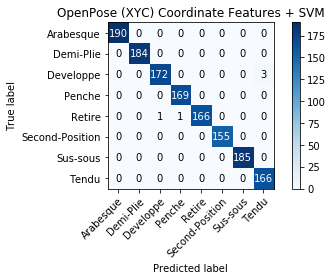

In [16]:
#Plot a confusion matrix
from sklearn.utils.multiclass import unique_labels
cm = confusion_matrix(y_test,y_pred)
cmap = plt.cm.Blues
classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='OpenPose (XYC) Coordinate Features + SVM',
           ylabel='True label',
           xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [17]:
# get the FP, FN, TP, TN values
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
print("FP:", FP)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
print("FN:", FN)
TP = np.diag(conf_matrix)
print("TP:", TP)
TN = conf_matrix.sum() - (FP + FN + TP)
print("TN:", FP)

[[190   0   0   0   0   0   0   0]
 [  0 184   0   0   0   0   0   0]
 [  0   0 172   0   0   0   0   3]
 [  0   0   0 169   0   0   0   0]
 [  0   0   1   1 166   0   0   0]
 [  0   0   0   0   0 155   0   0]
 [  0   0   0   0   0   0 185   0]
 [  0   0   0   0   0   0   0 166]]
FP: [0 0 1 1 0 0 0 3]
FN: [0 0 3 0 2 0 0 0]
TP: [190 184 172 169 166 155 185 166]
TN: [0 0 1 1 0 0 0 3]


In [18]:
FAR = (sum(FP))/(sum(FP)+sum(TN))
print("My FAR:", FAR)

My FAR: 0.000513136288998358


In [19]:
totalFAR = 0
for x in range(8):
    totalFAR += (FP[x])/(FP[x]+TN[x])
print("TotalFAR:", totalFAR)
avg = totalFAR/8
print("Computed Average FAR:", avg)

TotalFAR: 0.004086336230543921
Computed Average FAR: 0.0005107920288179901


In [20]:
FRR = (sum(FN))/(sum(FN)+sum(TP))
print("My FRR:", FRR)

My FRR: 0.0035919540229885057


In [21]:
totalFRR = 0
for x in range(8):
    totalFRR += (FN[x])/(FN[x]+TP[x])
print("TotalFRR:", totalFRR)
avg = totalFRR/8
print("Computed Average FRR:", avg)

TotalFRR: 0.029047619047619048
Computed Average FRR: 0.003630952380952381


In [22]:
#Specificity: TN/(TN+FP)
totalSpecificity = 0
for x in range(8):
    totalSpecificity += (TN[x])/(TN[x]+FP[x])
print("TotalSpecificity:", totalSpecificity)
avg = totalSpecificity/8
print("Computed Average Specificity:", avg)

TotalSpecificity: 7.995913663769455
Computed Average Specificity: 0.9994892079711819


In [23]:
#y_score = clf.predict_proba(X_test)
print(y_score[:1])

[[-2.16252689 -1.64648764 -1.93540448 -1.75765643 -1.824054   -2.05190218
   1.46082705 -1.971239  ]]
